In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [55]:
# the following line imports my spreadsheet that was saved in .csv format

df = pd.read_csv('mytable_customer_details.csv')

In [56]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),$56.05,NaN,No,0,True,False,False,True,False,3,20210727,$0.00,False,2 Year,No Phone Service,DSL
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,$20.00,NaN,No,0,True,False,True,False,False,3,20210727,$0.00,False,2 Year,One Line,No Internet Service
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),$61.90,NaN,No,0,False,False,True,True,True,2,20210727,$0.00,False,2 Year,Two or More Lines,DSL
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,$19.70,NaN,No,0,False,False,True,False,False,3,20210727,$0.00,False,1 Year,One Line,No Internet Service
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,$20.25,NaN,No,0,False,False,True,False,False,2,20210727,$0.00,False,2 Year,One Line,No Internet Service


In [57]:
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'tenure', 'is_female',
       'has_churned', 'has_phone', 'has_internet', 'has_phone_and_internet',
       'partner_dependents', 'start_date', 'average_monthly_charges',
       'validate_monthly_charges', 'contract_type_desc', 'phone_type_desc',
       'internet_type_desc'],
      dtype='object')

In [58]:
df.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,tenure,partner_dependents,start_date
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03
mean,0.162147,1.325004,1.222916,0.690473,32.368309,1.082209,2.018443e+07
std,0.368612,0.642730,0.778877,0.833755,24.597021,1.226274,2.089130e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.014122e+07
25%,0.000000,1.000000,1.000000,0.000000,9.000000,0.000000,2.016122e+07
50%,0.000000,1.000000,1.000000,0.000000,29.000000,1.000000,2.019031e+07
75%,0.000000,2.000000,2.000000,1.000000,55.000000,2.000000,2.020110e+07
max,1.000000,2.000000,2.000000,2.000000,79.000000,3.000000,2.021073e+07


In [67]:
df.dtypes

customer_id                  object
gender                       object
is_senior_citizen             int64
partner                      object
dependents                   object
phone_service                 int64
internet_service              int64
contract_type                 int64
payment_type                 object
monthly_charges             float64
total_charges                object
churn                        object
tenure                        int64
is_female                      bool
has_churned                    bool
has_phone                      bool
has_internet                   bool
has_phone_and_internet         bool
partner_dependents            int64
start_date                    int64
average_monthly_charges     float64
validate_monthly_charges       bool
contract_type_desc           object
phone_type_desc              object
internet_type_desc           object
dtype: object

In [69]:
# the following lines remvove $ signs and convert money from string to float

df.average_monthly_charges = df.average_monthly_charges.str.replace('$', '').astype(float)
df.monthly_charges = df.monthly_charges.str.replace('$','').astype(float)
#df.total_charges = df.total_charges.str.replace('$','').astype(float)

AttributeError: Can only use .str accessor with string values!

In [66]:
# the following changes payment type to float
df['payment_type_num'] = df.payment_type.str.replace('Credit card (automatic)', 1).astype(float)
df['payment_type_num'] = df.payment_type.str.replace('Bank transfer (automatic)', 2).astype(float)
df['payment_type_num'] = df.payment_type.str.replace('Electronic check', 3).astype(float)
df['payment_type_num'] = df.payment_type.str.replace('Mailed check', 4).astype(float)


<ipython-input-66-6cc0b29fa9b5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['payment_type_num'] = df.payment_type.str.replace('Credit card (automatic)', 1).astype(float)


TypeError: repl must be a string or callable

In [61]:
# the following command searches for pairwise correlation of all columns
# in the dataframe

df.corr()

# the highest correlation values are for:
# 'is_senior_citizen': 0.15
# 'start_date': 0.35
# 'internet_service': 0.31
# 'has_internet': 0.22
# 'has_internet_and_phone': 0.20

# the following values for phone are provided because they may have some
# relation to internet service
# the phone values do not appear to be important

# 'phone_service': 0.03
# 'has_phone': 0.01

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges
is_senior_citizen,1.000000,0.113791,0.259390,-0.142554,0.220173,0.016107,0.001874,0.150889,0.008576,0.182742,0.167749,-0.151073,-0.015393,0.220525,0.017399
phone_service,0.113791,1.000000,0.307988,0.083343,0.490700,0.258792,0.009451,0.036310,0.675070,0.082560,0.503650,0.033120,-0.255660,0.489895,0.008812
internet_service,0.259390,0.307988,1.000000,-0.290189,0.905491,0.032938,0.010380,0.316846,0.093720,0.825819,0.793101,-0.134267,-0.031004,0.904461,0.039020
contract_type,-0.142554,0.083343,-0.290189,1.000000,-0.074195,0.671321,-0.000126,-0.396713,0.002247,-0.242388,-0.213817,0.301843,-0.669704,-0.077252,-0.057812
monthly_charges,0.220173,0.490700,0.905491,-0.074195,1.000000,0.247633,0.014569,0.193356,0.247398,0.763557,0.835774,-0.045625,-0.244995,0.998086,0.030685
tenure,0.016107,0.258792,0.032938,0.671321,0.247633,1.000000,-0.004522,-0.351726,0.008398,0.038591,0.039624,0.273160,-0.993588,0.249789,0.052051
is_female,0.001874,0.009451,0.010380,-0.000126,0.014569,-0.004522,1.000000,0.008612,0.006488,0.006026,0.009487,-0.007121,0.005331,0.013992,0.003219
has_churned,0.150889,0.036310,0.316846,-0.396713,0.193356,-0.351726,0.008612,1.000000,0.011942,0.227890,0.209988,-0.184012,0.351451,0.194125,0.023771
has_phone,0.008576,0.675070,0.093720,0.002247,0.247398,0.008398,0.006488,0.011942,1.000000,-0.172209,0.484538,0.005899,-0.007988,0.247759,0.011366
has_internet,0.182742,0.082560,0.825819,-0.242388,0.763557,0.038591,0.006026,0.227890,-0.172209,1.000000,0.778260,-0.104712,-0.037593,0.761871,0.031564


<AxesSubplot:>

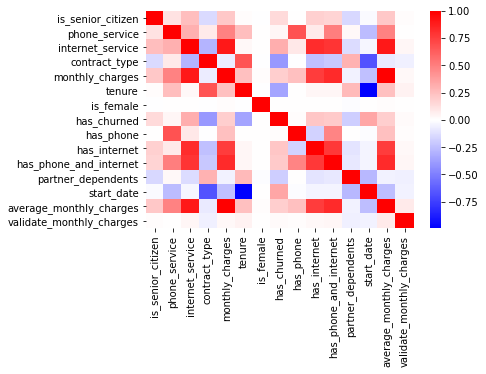

In [62]:
# the following command creates a heatmap of the correlation values found previously

#sns.heatmap(df.corr(), cmap='coolwarm')
# the following color scheme is easier to understand
sns.heatmap(df.corr(), cmap = 'bwr')

In [41]:
# the number of customers who have churned

df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [42]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),$56.05,NaN,No,0,True,False,False,True,False,3,20210727,$0.00,False,2 Year,No Phone Service,DSL
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,$20.00,NaN,No,0,True,False,True,False,False,3,20210727,$0.00,False,2 Year,One Line,No Internet Service
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),$61.90,NaN,No,0,False,False,True,True,True,2,20210727,$0.00,False,2 Year,Two or More Lines,DSL
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,$19.70,NaN,No,0,False,False,True,False,False,3,20210727,$0.00,False,1 Year,One Line,No Internet Service
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,$20.25,NaN,No,0,False,False,True,False,False,2,20210727,$0.00,False,2 Year,One Line,No Internet Service


In [51]:
df.average_monthly_charges = df.average_monthly_charges.str.replace('$', '').astype(float)
df.monthly_charges = df.monthly_charges.str.replace('$','').astype(float)

<ipython-input-51-119fcc0a852f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.average_monthly_charges = df.average_monthly_charges.str.replace('$', '').astype(float)
<ipython-input-51-119fcc0a852f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.monthly_charges = df.monthly_charges.str.replace('$','').astype(float)


In [52]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,NaN,No,0,True,False,False,True,False,3,20210727,0.0,False,2 Year,No Phone Service,DSL
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,NaN,No,0,True,False,True,False,False,3,20210727,0.0,False,2 Year,One Line,No Internet Service
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,NaN,No,0,False,False,True,True,True,2,20210727,0.0,False,2 Year,Two or More Lines,DSL
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,NaN,No,0,False,False,True,False,False,3,20210727,0.0,False,1 Year,One Line,No Internet Service
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,NaN,No,0,False,False,True,False,False,2,20210727,0.0,False,2 Year,One Line,No Internet Service


In [54]:
df.dtypes

customer_id                  object
gender                       object
is_senior_citizen             int64
partner                      object
dependents                   object
phone_service                 int64
internet_service              int64
contract_type                 int64
payment_type                 object
monthly_charges             float64
total_charges                object
churn                        object
tenure                        int64
is_female                      bool
has_churned                    bool
has_phone                      bool
has_internet                   bool
has_phone_and_internet         bool
partner_dependents            int64
start_date                    int64
average_monthly_charges     float64
validate_monthly_charges       bool
contract_type_desc           object
phone_type_desc              object
internet_type_desc           object
dtype: object